<a href="https://colab.research.google.com/github/walnashgit/S24-SD/blob/main/S24_SD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/walnashgit/S24-SD.git

Cloning into 'S24-SD'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 9.78 KiB | 2.45 MiB/s, done.


In [1]:
%cd /content/S24-SD

/content/S24-SD


In [3]:
!pip install -q --upgrade transformers==4.25.1 diffusers ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 23.0 MB/s eta 0:00:00


In [2]:
# For video display:
from pathlib import Path

import torch
from huggingface_hub import notebook_login
from transformers import logging

from utils import (tokenizer, text_encoder, torch_device, generate_with_embs,
                   get_output_embeds, plot_image)


if not (Path.home()/'.cache/huggingface'/'token').exists(): notebook_login()

# Supress some unnecessary warnings when loading the CLIPTextModel
logging.set_verbosity_error()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.3.self_attn.v_proj.weight', 'vision_model.encoder.

In [26]:
style_embed = torch.load('learned_embeds_matrix.bin')
style_embed.keys()

dict_keys(['<hatman-matrix>'])

  0%|          | 0/30 [00:00<?, ?it/s]

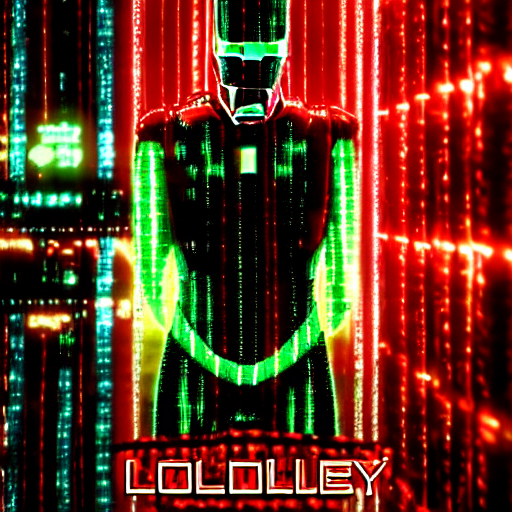

In [27]:
prompt = 'IronMan in the style of puppy'

torch.manual_seed(10)

# Tokenize
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
input_ids = text_input.input_ids.to(torch_device)


# Access the embedding layer
token_emb_layer = text_encoder.text_model.embeddings.token_embedding

# Get token embeddings
token_embeddings = token_emb_layer(input_ids)

# The new embedding - special style
replacement_token_embedding = style_embed['<hatman-matrix>'].to(torch_device)

# The new embedding. In this case just the input embedding of token 2368...mixing CAT
# replacement_token_embedding = text_encoder.get_input_embeddings()(torch.tensor(2368, device=torch_device))

# Insert this into the token embeddings (
token_embeddings[0, torch.where(input_ids[0]==6829)] = replacement_token_embedding.to(torch_device)

# get pos embed
pos_emb_layer = text_encoder.text_model.embeddings.position_embedding
position_ids = text_encoder.text_model.embeddings.position_ids[:, :77]
position_embeddings = pos_emb_layer(position_ids)

# Combine with pos embs
input_embeddings = token_embeddings + position_embeddings

#  Feed through to get final output embs
modified_output_embeddings = get_output_embeds(input_embeddings)

image = generate_with_embs(modified_output_embeddings, text_input)

image

# plot_image(image)

In [29]:
style_embed = torch.load('learned_embeds_mosiac.bin')
style_embed.keys()

dict_keys(['<abb-9-12 -mosaic>'])

  0%|          | 0/30 [00:00<?, ?it/s]

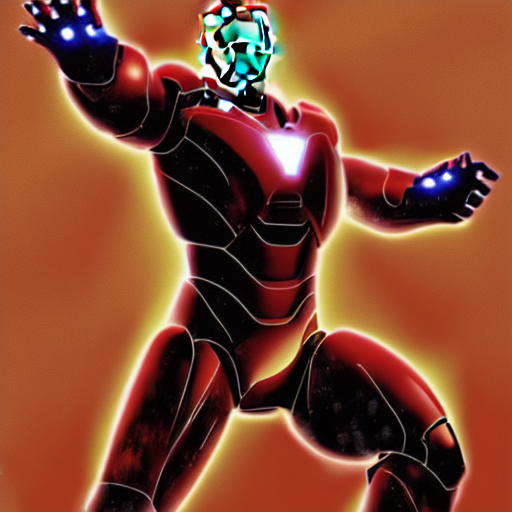

In [30]:
prompt = 'IronMan in the style of puppy'

torch.manual_seed(15)

# Tokenize
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
input_ids = text_input.input_ids.to(torch_device)


# Access the embedding layer
token_emb_layer = text_encoder.text_model.embeddings.token_embedding

# Get token embeddings
token_embeddings = token_emb_layer(input_ids)

# The new embedding - special style
replacement_token_embedding = style_embed['<abb-9-12 -mosaic>'].to(torch_device)

# The new embedding. In this case just the input embedding of token 2368...mixing CAT
# replacement_token_embedding = text_encoder.get_input_embeddings()(torch.tensor(2368, device=torch_device))

# Insert this into the token embeddings (
token_embeddings[0, torch.where(input_ids[0]==6829)] = replacement_token_embedding.to(torch_device)

# get pos embed
pos_emb_layer = text_encoder.text_model.embeddings.position_embedding
position_ids = text_encoder.text_model.embeddings.position_ids[:, :77]
position_embeddings = pos_emb_layer(position_ids)

# Combine with pos embs
input_embeddings = token_embeddings + position_embeddings

#  Feed through to get final output embs
modified_output_embeddings = get_output_embeds(input_embeddings)

image = generate_with_embs(modified_output_embeddings, text_input)

image

In [31]:
style_embed = torch.load('learned_embeds_pokemon.bin')
style_embed.keys()

dict_keys(['<pkmn-modern>'])

  0%|          | 0/30 [00:00<?, ?it/s]

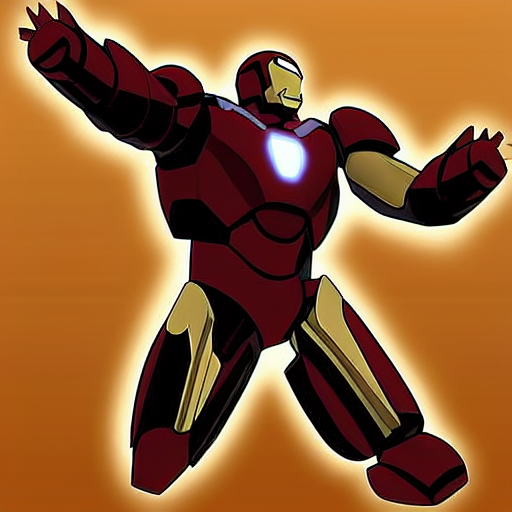

In [32]:
prompt = 'IronMan in the style of puppy'

torch.manual_seed(20)

# Tokenize
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
input_ids = text_input.input_ids.to(torch_device)


# Access the embedding layer
token_emb_layer = text_encoder.text_model.embeddings.token_embedding

# Get token embeddings
token_embeddings = token_emb_layer(input_ids)

# The new embedding - special style
replacement_token_embedding = style_embed['<pkmn-modern>'].to(torch_device)

# The new embedding. In this case just the input embedding of token 2368...mixing CAT
# replacement_token_embedding = text_encoder.get_input_embeddings()(torch.tensor(2368, device=torch_device))

# Insert this into the token embeddings (
token_embeddings[0, torch.where(input_ids[0]==6829)] = replacement_token_embedding.to(torch_device)

# get pos embed
pos_emb_layer = text_encoder.text_model.embeddings.position_embedding
position_ids = text_encoder.text_model.embeddings.position_ids[:, :77]
position_embeddings = pos_emb_layer(position_ids)

# Combine with pos embs
input_embeddings = token_embeddings + position_embeddings

#  Feed through to get final output embs
modified_output_embeddings = get_output_embeds(input_embeddings)

image = generate_with_embs(modified_output_embeddings, text_input)

image

In [33]:
style_embed = torch.load('learned_embeds_mobious.bin')
style_embed.keys()

dict_keys(['<moebius>'])

  0%|          | 0/30 [00:00<?, ?it/s]

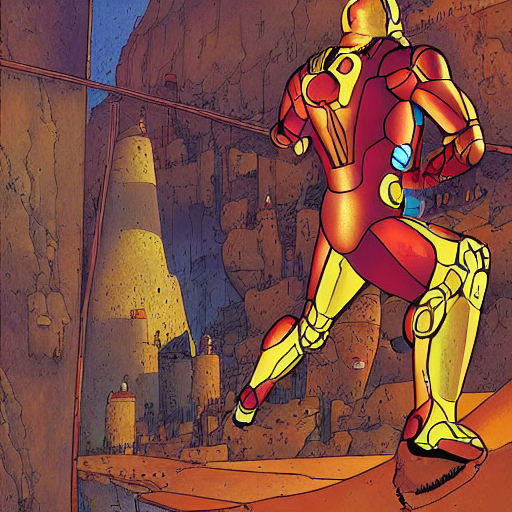

In [34]:
prompt = 'IronMan in the style of puppy'

torch.manual_seed(25)

# Tokenize
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
input_ids = text_input.input_ids.to(torch_device)


# Access the embedding layer
token_emb_layer = text_encoder.text_model.embeddings.token_embedding

# Get token embeddings
token_embeddings = token_emb_layer(input_ids)

# The new embedding - special style
replacement_token_embedding = style_embed['<moebius>'].to(torch_device)

# The new embedding. In this case just the input embedding of token 2368...mixing CAT
# replacement_token_embedding = text_encoder.get_input_embeddings()(torch.tensor(2368, device=torch_device))

# Insert this into the token embeddings (
token_embeddings[0, torch.where(input_ids[0]==6829)] = replacement_token_embedding.to(torch_device)

# get pos embed
pos_emb_layer = text_encoder.text_model.embeddings.position_embedding
position_ids = text_encoder.text_model.embeddings.position_ids[:, :77]
position_embeddings = pos_emb_layer(position_ids)

# Combine with pos embs
input_embeddings = token_embeddings + position_embeddings

#  Feed through to get final output embs
modified_output_embeddings = get_output_embeds(input_embeddings)

image = generate_with_embs(modified_output_embeddings, text_input)

image

In [35]:
style_embed = torch.load('learned_embeds_midj.bin')
style_embed.keys()

dict_keys(['<midjourney-style>'])

  0%|          | 0/30 [00:00<?, ?it/s]

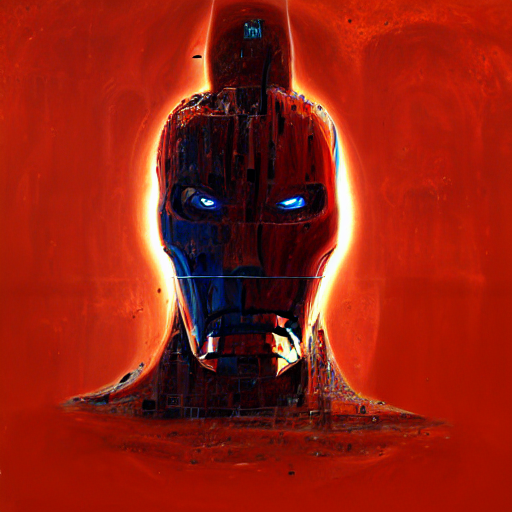

In [36]:
prompt = 'IronMan in the style of puppy'

torch.manual_seed(30)

# Tokenize
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
input_ids = text_input.input_ids.to(torch_device)


# Access the embedding layer
token_emb_layer = text_encoder.text_model.embeddings.token_embedding

# Get token embeddings
token_embeddings = token_emb_layer(input_ids)

# The new embedding - special style
replacement_token_embedding = style_embed['<midjourney-style>'].to(torch_device)

# The new embedding. In this case just the input embedding of token 2368...mixing CAT
# replacement_token_embedding = text_encoder.get_input_embeddings()(torch.tensor(2368, device=torch_device))

# Insert this into the token embeddings (
token_embeddings[0, torch.where(input_ids[0]==6829)] = replacement_token_embedding.to(torch_device)

# get pos embed
pos_emb_layer = text_encoder.text_model.embeddings.position_embedding
position_ids = text_encoder.text_model.embeddings.position_ids[:, :77]
position_embeddings = pos_emb_layer(position_ids)

# Combine with pos embs
input_embeddings = token_embeddings + position_embeddings

#  Feed through to get final output embs
modified_output_embeddings = get_output_embeds(input_embeddings)

image = generate_with_embs(modified_output_embeddings, text_input)

image